In [2]:
import pandas as pd
import requests as re
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from math import log10, floor


In [3]:
def format_func(value, tick_number=None):
    return '%1.2fM' % (value * 1e-6)

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

In [5]:
data['date'] = pd.to_datetime(data['date'])

<h3> Linear and Logarithm Progression of COVID Cases around the world </h3>
<p> Logarithm scale really helps with large numbers visualization</p>


C:\Users\baigs\AppData\Local\Temp\ipykernel_16404\1160735268.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(ax=axes[0],data=total_cases_by_time, palette="tab10", x='date', y ='total_cases')
C:\Users\baigs\AppData\Local\Temp\ipykernel_16404\1160735268.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(ax=axes[1],data=total_cases_by_time_log, palette="tab10",  x='date', y ='total_cases')


Text(0.5, 1.0, 'Total Cases (Logarithm)')

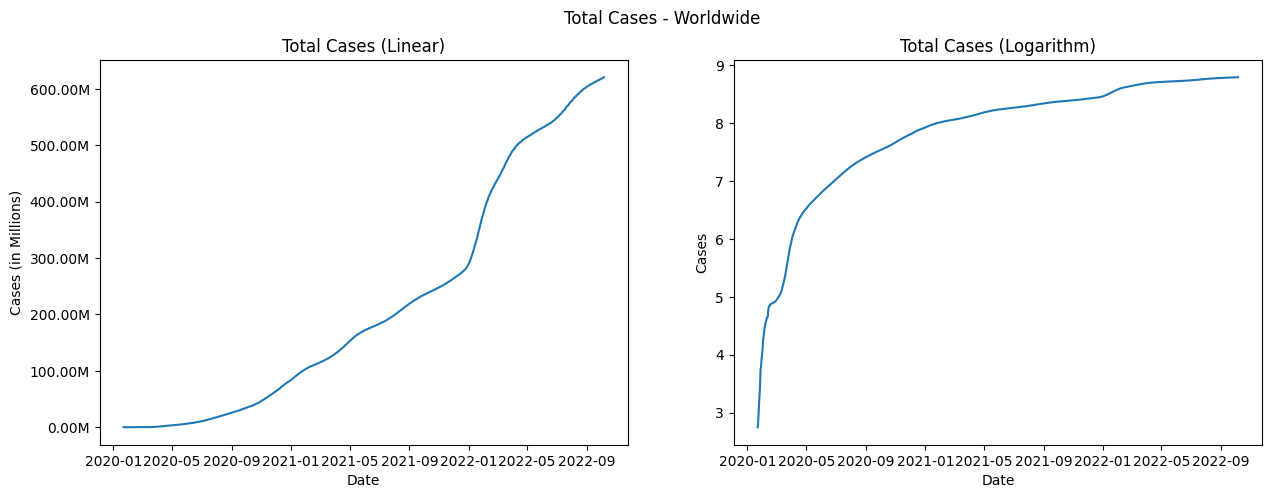

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Total Cases - Worldwide')

# Total Cases Linear
total_cases_by_time = data[data['location'] == 'World'][['date','total_cases']]
sns.lineplot(ax=axes[0],data=total_cases_by_time, palette="tab10", x='date', y ='total_cases')
axes[0].set(xlabel='Date', ylabel='Cases (in Millions)')
axes[0].set_title('Total Cases (Linear)')
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(format_func))

# Total Cases Logarithm
total_cases_by_time_log = data[data['location'] == 'World'][['date','total_cases']]
total_cases_by_time_log['total_cases'] = np.log10(total_cases_by_time_log['total_cases'])
sns.lineplot(ax=axes[1],data=total_cases_by_time_log, palette="tab10",  x='date', y ='total_cases')
axes[1].set(xlabel='Date', ylabel='Cases')
axes[1].set_title('Total Cases (Logarithm)')


<h3> Linear and Logarithm Progression of COVID Deaths around the world </h3>


C:\Users\baigs\AppData\Local\Temp\ipykernel_16404\863805602.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(ax=axes[0],data=total_deaths_by_time, palette="tab10", x='date', y ='total_deaths')
C:\Users\baigs\AppData\Local\Temp\ipykernel_16404\863805602.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(ax=axes[1],data=total_deaths_by_time_log, palette="tab10", x='date', y ='total_deaths')


Text(0.5, 1.0, 'Total Deaths (Logarithm)')

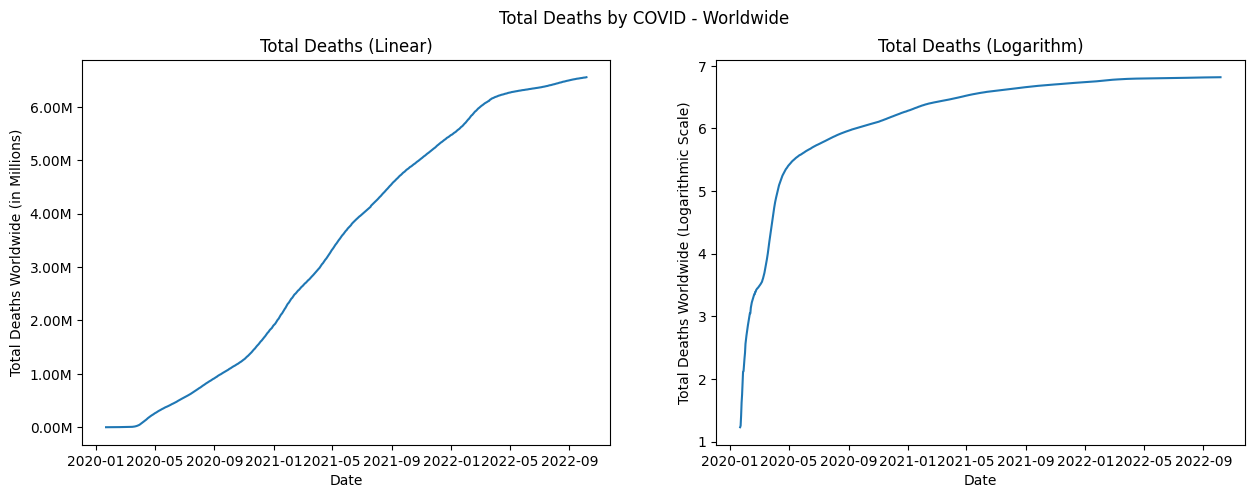

In [7]:

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Total Deaths by COVID - Worldwide')

# Total Deaths Linear
total_deaths_by_time = data[data['location'] == 'World'][['date','total_deaths']]
sns.lineplot(ax=axes[0],data=total_deaths_by_time, palette="tab10", x='date', y ='total_deaths')
axes[0].set(xlabel='Date', ylabel='Total Deaths Worldwide (in Millions)')
axes[0].set_title('Total Deaths (Linear)')
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(format_func))
# Total Deaths Logarithmic
total_deaths_by_time_log = data[data['location'] == 'World'][['date','total_deaths']]
total_deaths_by_time_log['total_deaths'] = np.log10(total_deaths_by_time_log['total_deaths'])
sns.lineplot(ax=axes[1],data=total_deaths_by_time_log, palette="tab10", x='date', y ='total_deaths')
axes[1].set(xlabel='Date', ylabel='Total Deaths Worldwide (Logarithmic Scale)')
axes[1].set_title('Total Deaths (Logarithm)')


<h3> Daily new cases with rolling 7 day average</h3>

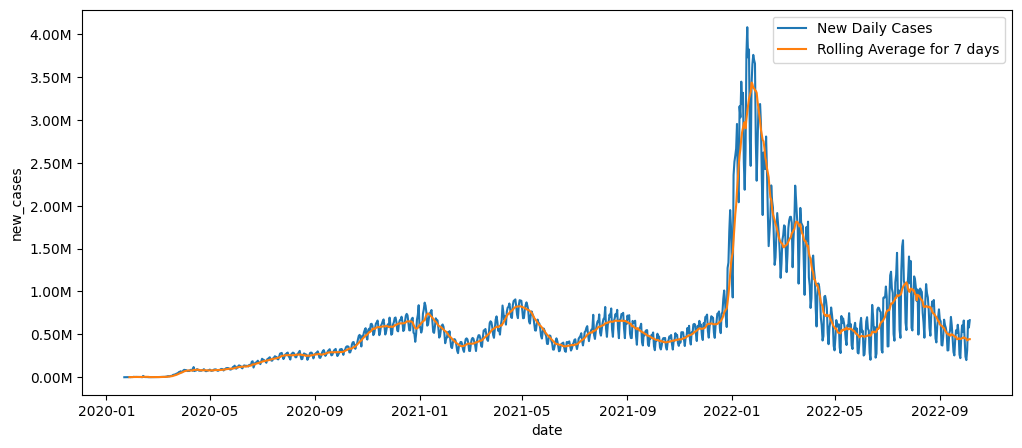

In [8]:
daily_cases = data[data['location'] == 'World'][['date','new_cases']]
daily_cases['7day_rolling_avg'] = daily_cases['new_cases'].rolling(7).mean()

# set figure size
plt.figure( figsize = ( 12, 5))
  
# plot a simple time series plot
# using seaborn.lineplot()
ax = sns.lineplot( x = 'date',
             y = 'new_cases',
             data = daily_cases,
             label = 'New Daily Cases')
  
# plot using rolling average
ax = sns.lineplot( x = 'date',
             y = '7day_rolling_avg',
             data = daily_cases,
             label = 'Rolling Average for 7 days')

ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
  

<h3> Daily deaths with 7 day rolling average </h3>


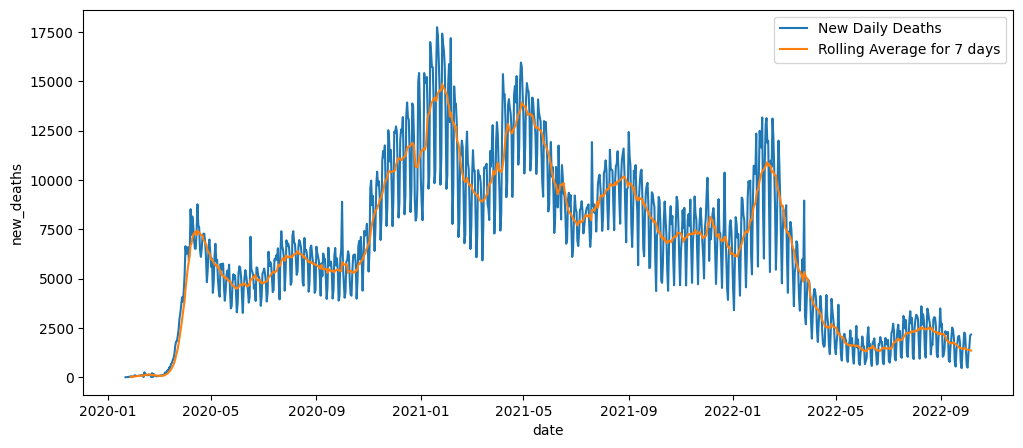

In [9]:
daily_deaths = data[data['location'] == 'World'][['date','new_deaths']]
daily_deaths['7day_rolling_avg'] = daily_deaths['new_deaths'].rolling(7).mean()

# set figure size
plt.figure( figsize = ( 12, 5))
  
# plot a simple time series plot
# using seaborn.lineplot()
ax = sns.lineplot( x = 'date',
             y = 'new_deaths',
             data = daily_deaths,
             label = 'New Daily Deaths')
  
# plot using rolling average
ax =sns.lineplot( x = 'date',
             y = '7day_rolling_avg',
             data = daily_deaths,
             label = 'Rolling Average for 7 days')
#ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))

<h3> Total Cases by Continents </h3>


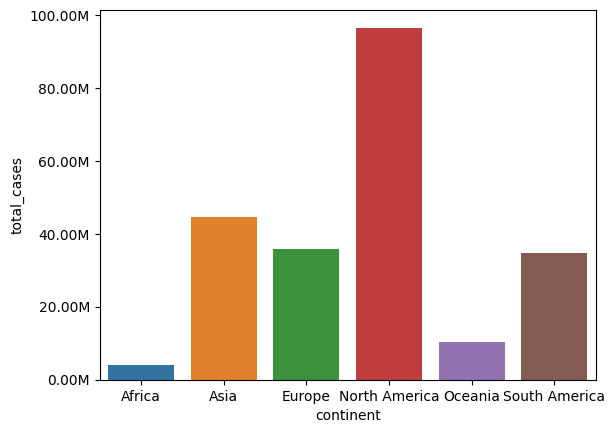

In [10]:
cases_by_continent =  data.groupby(['continent'], as_index=False)[['continent','total_cases']].max()
ax = sns.barplot(data=cases_by_continent, x='continent', y='total_cases')
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))

<h3> Heatmap </h3>
<p> Relational analysis between each variable</p>


<AxesSubplot: >

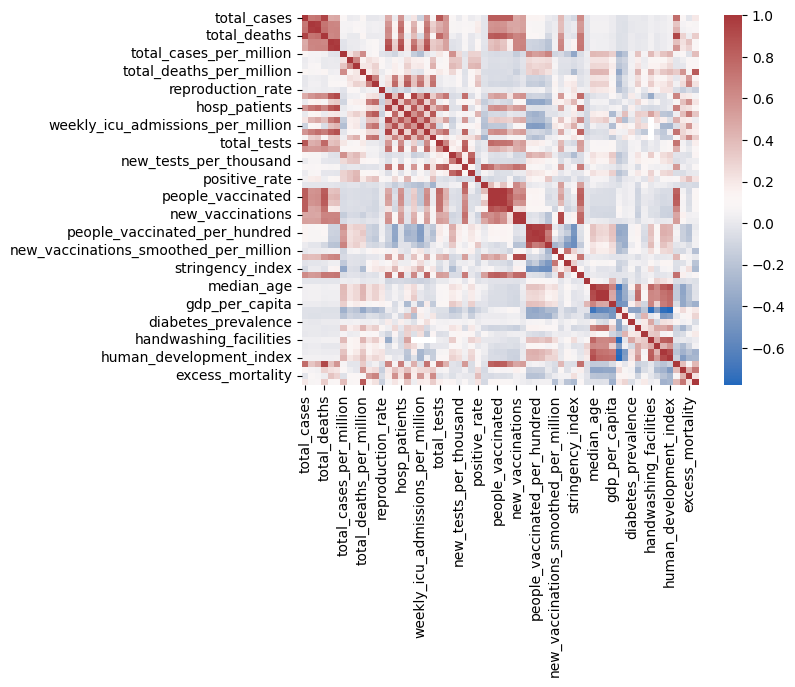

In [20]:
data.corr()
sns.heatmap(data=data.corr(), cmap='vlag')

[Text(0.5, 1.0, 'Life Expectancy in the world')]

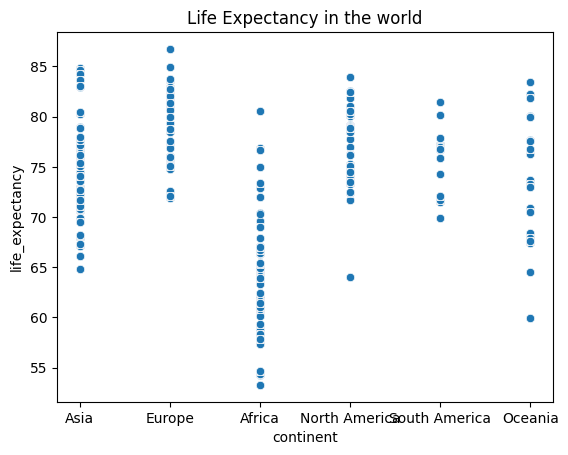

In [22]:

sns.scatterplot(data=data, x='continent', y='life_expectancy').set(title='Life Expectancy')